In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
if not os.path.exists('./data'):
    os.makedirs('./data')

!wget -qO ./data/Churn.csv "https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv"

# Exploratory data analysis

In [3]:
# Importing data using pandas
telco = pd.read_csv('./data/Churn.csv')
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
# Data type
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

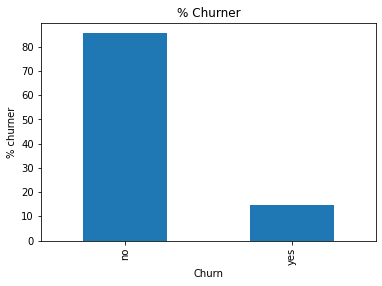

In [5]:
pd01 = telco['Churn'].value_counts(normalize=True)*100
pd01.plot.bar()
plt.title('% Churner')
plt.xlabel('Churn')
plt.ylabel('% churner')
plt.show()

In [6]:
# Group telco by 'Churn' and compute the mean
telco.groupby('Churn').mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


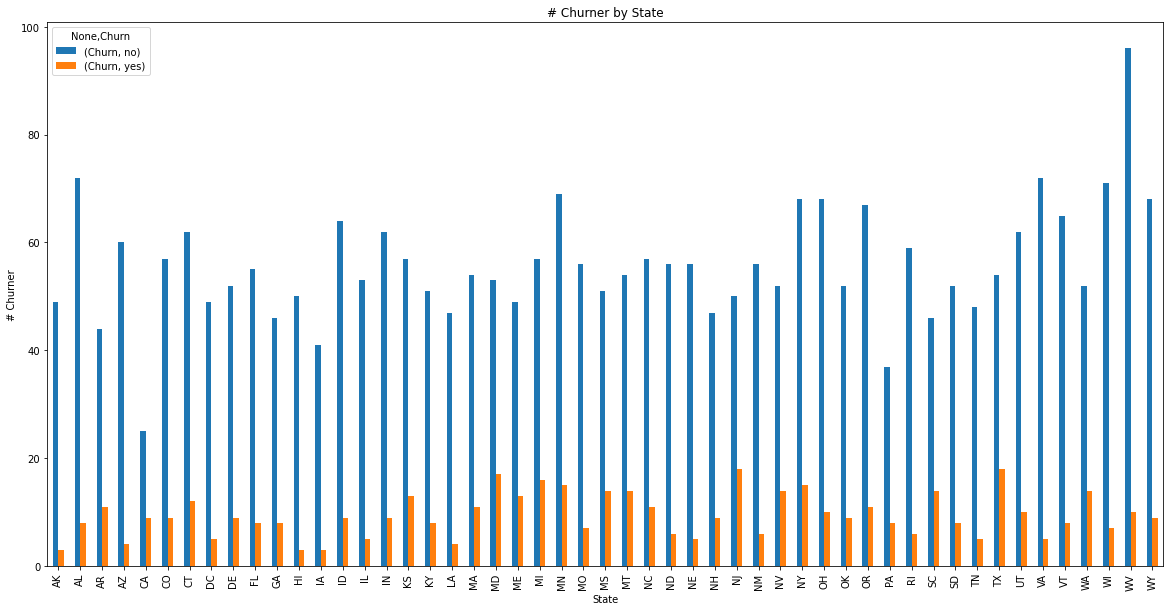

In [7]:
# Count the number of churners and non-churners by State
pd01 = pd.DataFrame(telco.groupby('State')['Churn'].value_counts())\
    .unstack(level=1)
pd01.plot.bar(figsize=(20, 10))
plt.title('# Churner by State')
plt.xlabel('State')
plt.ylabel('# Churner')
plt.show()

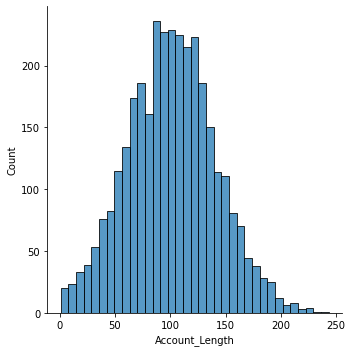

In [8]:
# Visualizing the distribution of account lengths
sns.displot(telco['Account_Length'])
plt.show()

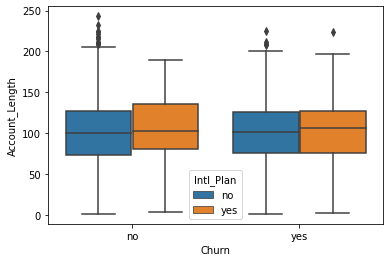

In [9]:
# Differences in account length
sns.boxplot(data=telco, x='Churn', y='Account_Length', 
    hue='Intl_Plan')
plt.show()

# Feature engineering

In [10]:
# Dropping unnecessary features
telco = telco.drop(['Area_Code', 'Phone'], axis=1)

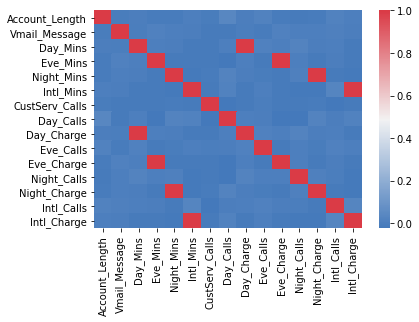

In [11]:
# Highly correlated features can be dropped
# calculate the correlation matrix
corr = telco.corr()
# plot the heatmap
# Add diverging colormap from red to blue
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
    cmap=cmap)
plt.show()

In [12]:
# Ratio between Minutes and Charge
telco['Day_Cost'] = telco['Day_Mins']/telco['Day_Charge']
telco['Eve_Cost'] = telco['Eve_Mins']/telco['Eve_Charge']
telco['Night_Cost'] = telco['Night_Mins']/telco['Night_Charge']
telco['Intl_Cost'] = telco['Intl_Mins']/telco['Intl_Charge']

# Average length of calls
telco['Avg_Day_Mins'] = telco['Day_Mins']/telco['Day_Calls']
telco['Avg_Eve_Mins'] = telco['Eve_Mins']/telco['Eve_Calls']
telco['Avg_Night_Mins'] = telco['Night_Mins']/telco['Night_Calls']
telco['Avg_Intl_Mins'] = telco['Intl_Mins']/telco['Intl_Calls']

In [13]:
# Dropping Highly correlated  features
drop_var = ['Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins',
    'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge']
telco = telco.drop(drop_var, axis=1)

# Data preprocessing

In [16]:
# Data type
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   CustServ_Calls  3333 non-null   int64  
 3   Churn           3333 non-null   object 
 4   Intl_Plan       3333 non-null   object 
 5   Vmail_Plan      3333 non-null   object 
 6   Day_Calls       3333 non-null   int64  
 7   Eve_Calls       3333 non-null   int64  
 8   Night_Calls     3333 non-null   int64  
 9   Intl_Calls      3333 non-null   int64  
 10  State           3333 non-null   object 
 11  Day_Cost        3331 non-null   float64
 12  Eve_Cost        3332 non-null   float64
 13  Night_Cost      3333 non-null   float64
 14  Intl_Cost       3315 non-null   float64
 15  Avg_Day_Mins    3331 non-null   float64
 16  Avg_Eve_Mins    3332 non-null   float64
 17  Avg_Night_Mins  3333 non-null   f

In [ ]:
# Encoding binary features

telco['Intl_Plan'] = LabelEncoder().fit_transform(telco['Intl_Plan'])
telco['Vmail_Plan'] = LabelEncoder().fit_transform(telco['Vmail_Plan'])
telco['Churn'] = LabelEncoder().fit_transform(telco['Churn'])

# Perform one hot encoding on 'State' 
telco_state = pd.get_dummies(telco['State'])

# Standardization
scale_var = ['Intl_Calls', 'Night_Mins']
telco_scaled = StandardScaler().fit_transform(telco[scale_var])
telco_scaled = pd.DataFrame(telco_scaled, columns=scale_var)